# **Group Report**

# TODO
- Rewording and rewrite
- review and add any technical things
- Update discussion

In [19]:
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)
library(broom)
library(leaps)
library(cowplot)
library(GGally)
library(AER)
library(glmnet)
library(stats)

## **Intro**

### **Question**

Knowing the age distribution of a company's workforce helps employers plan the workplace culture and the hiring of new staff (Gao et al., 2018). Further, being able to predict an employee's age is a possible way to assess the overall performance of the company (Shore et al, 2003). As such, we aim to find how accuractely can age be predicted using a linear regression of the optimally selected features of an employee dataset. Then, we plan on quantifying its effectiveness and evaluating its adherence to our linear model assumptions.

Data sourced from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

### **Description**

This dataset contains personal data from 4653 employees from a company with locations across India. For each employee it contains the following information: Education, JoiningYear, City, PaymentTier, Age, Gender, EverBenched, ExperienceInCurrentDomain, LeaveOrNot. There are no missing values from any of these columns in the dataset. 

- `Education` is a categorical/ordinal variable with levels: Bachelors, Masters, PHD. A vase majority of employees only have a Bachelors while only a few of a PhD.
- `JoiningYear` is a quantitative variable with range from 2012 to 2018, having both a mean and median of 2015.
- `City` is a categorical variable with levels: Bangalore, Pune, and New Delhi. Around half of employees work in Bangalore while the other half are split between New Delhi and Pune. 
- `PaymentTier` is a categorical and possibly ordinal variable with levels: 1, 2, 3. 3 is by far the most abundant and 1 is the least.
- `Age` is a quantitative variable with range 22-41 with mean 29.39 and median 28.
- `Gender` is a qualitative variable with levels: Male and Female. There are 1875 Females and 2778 Males.
- `Everbenched` is a binary qualitative variable with levels: yes and no. Only 478 of 4653 have ever been benched.
- `ExperienceInCurrentDomain` is a quantitative variable with a range from 0-7 years. The mean and median are both close to 3.
- `LeaveOrNot` is a binary qualitative variable with levels 0 or 1. 1600 or around a third are 1, the rest are 0.


<br>

## **Methods and Results**

### **EDA**

#### **Loading Data**

We load the data from the web:

In [20]:
employee_data <- read_csv("https://raw.githubusercontent.com/zhtgeneral/stat-301-data/main/Employee.csv", show_col_types = FALSE)
head(employee_data, 1)

Education JoiningYear City      PaymentTier Age Gender EverBenched
1 Bachelors 2017        Bangalore 3           34  Male   No         
  ExperienceInCurrentDomain LeaveOrNot
1 0                         0

In [21]:
nrow(employee_data)

[1] 4653

In [22]:
sum(is.na(employee_data))

[1] 0

<br>

#### **Reshaping data**

We make our categorical variables as factors for analysis and to ensure they are properly interpreted by the model we create.

In [23]:
employee_data$Education   = factor(employee_data$Education)
employee_data$City        = factor(employee_data$City)
employee_data$PaymentTier = factor(employee_data$PaymentTier)
employee_data$Education   = factor(employee_data$Education)
employee_data$Gender      = factor(employee_data$Gender)
employee_data$EverBenched = factor(employee_data$EverBenched)
employee_data$LeaveOrNot  = factor(employee_data$LeaveOrNot)
employee_data |> head(1)

Education JoiningYear City      PaymentTier Age Gender EverBenched
1 Bachelors 2017        Bangalore 3           34  Male   No         
  ExperienceInCurrentDomain LeaveOrNot
1 0                         0

<br>

#### **Visualization**

We explore the association of the explanatory variables with the response below:

We plot the distribution of age to serve as a reference for within group comparisons.

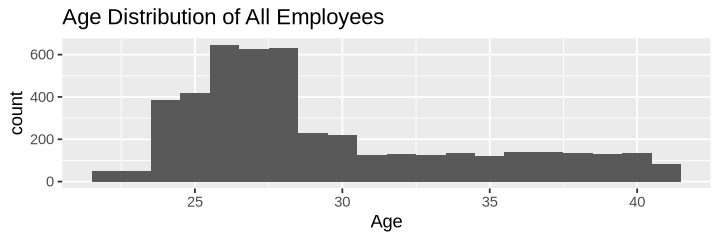

In [24]:
options(repr.plot.width = 6, repr.plot.height = 2)
ggplot(employee_data, aes(x = Age)) + geom_histogram(bins = 20) + xlab("Age") + ggtitle("Age Distribution of All Employees")

<br>

Next, we compare the explanatory variables with Age to see if they could be associated with the response.

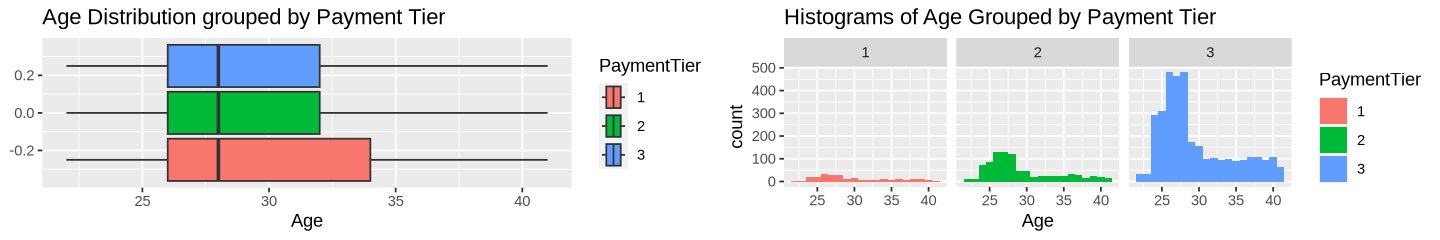

In [25]:
options(repr.plot.width = 12, repr.plot.height = 2)
ap1 <- ggplot(employee_data, aes(Age, fill = PaymentTier)) + geom_boxplot() + ggtitle("Age Distribution grouped by Payment Tier")
ap2 <- ggplot(employee_data, aes(Age, fill = PaymentTier)) + geom_histogram(bins = 20) + facet_grid(.~PaymentTier) + ggtitle("Histograms of Age Grouped by Payment Tier")
plot_grid(ap1, ap2, ncol = 2)

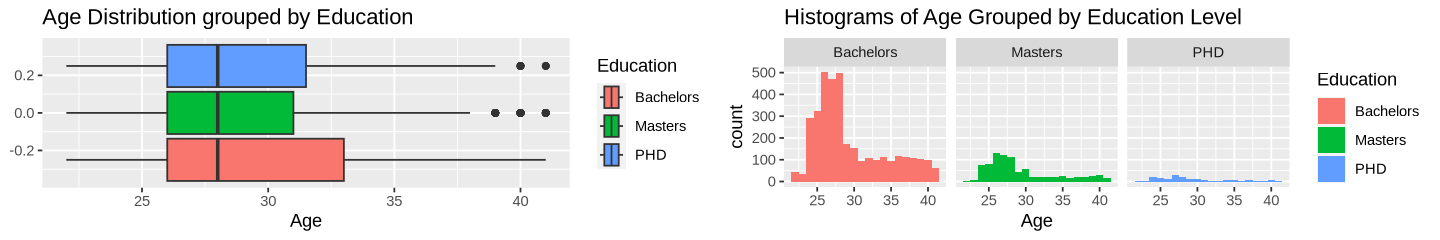

In [26]:
ae1 <- ggplot(employee_data, aes(Age, fill = Education)) + geom_boxplot() + ggtitle("Age Distribution grouped by Education")
ae2 <- ggplot(employee_data, aes(Age, fill = Education)) + geom_histogram(bins=20) + facet_grid(.~Education) + ggtitle("Histograms of Age Grouped by Education Level")
plot_grid(ae1, ae2, ncol = 2)

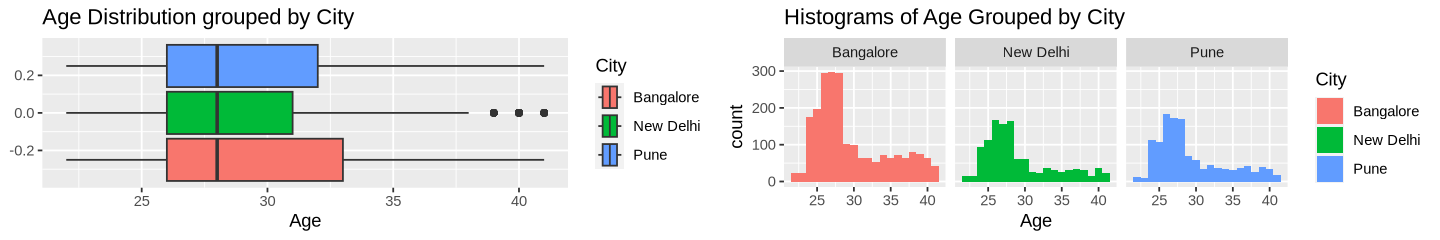

In [27]:
ac1 <- ggplot(employee_data, aes(Age, fill = City)) + geom_boxplot() + ggtitle("Age Distribution grouped by City")
ac2 <- ggplot(employee_data, aes(Age, fill = City)) + geom_histogram(bins = 20) + facet_grid(.~City) + ggtitle("Histograms of Age Grouped by City")
plot_grid(ac1, ac2, ncol = 2)

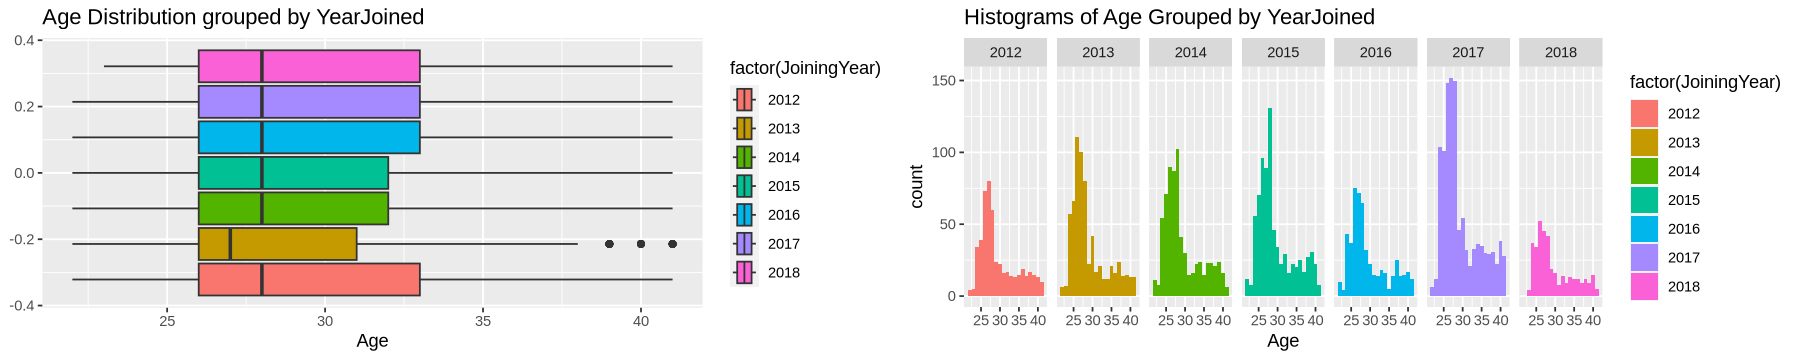

In [28]:
options(repr.plot.width = 15, repr.plot.height = 3)
ay1 <- ggplot(employee_data, aes(Age, fill = factor(JoiningYear))) + geom_boxplot() + ggtitle("Age Distribution grouped by YearJoined")
ay2 <- ggplot(employee_data, aes(Age, fill = factor(JoiningYear))) + geom_histogram(bins = 20) + facet_grid(.~JoiningYear) + ggtitle("Histograms of Age Grouped by YearJoined")
plot_grid(ay1, ay2, ncol = 2)

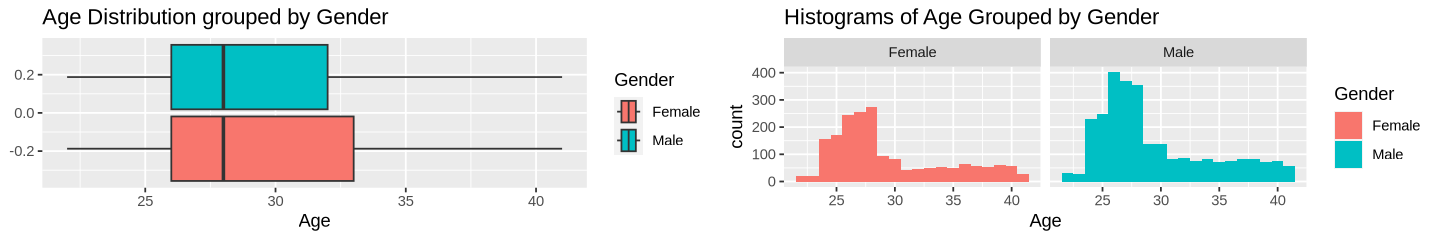

In [29]:
options(repr.plot.width = 12, repr.plot.height = 2)
ag1 <- ggplot(employee_data, aes(Age, fill = Gender)) + geom_boxplot() + ggtitle("Age Distribution grouped by Gender")
ag2 <- ggplot(employee_data, aes(Age, fill = Gender)) + geom_histogram(bins = 20) + facet_grid(.~Gender) + ggtitle("Histograms of Age Grouped by Gender")
plot_grid(ag1, ag2, ncol = 2)

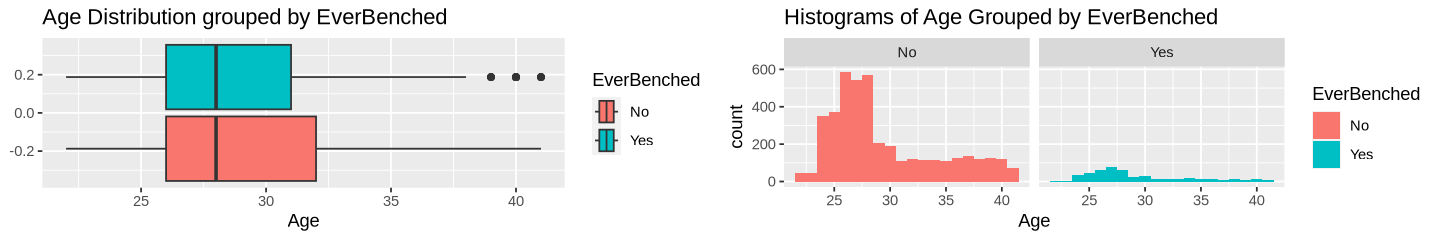

In [30]:
ab1 <- ggplot(employee_data, aes(Age, fill = EverBenched)) + geom_boxplot() + ggtitle("Age Distribution grouped by EverBenched")
ab2 <- ggplot(employee_data, aes(Age, fill = EverBenched)) + geom_histogram(bins = 20) + facet_grid(.~EverBenched) + ggtitle("Histograms of Age Grouped by EverBenched")
plot_grid(ab1, ab2, ncol = 2)

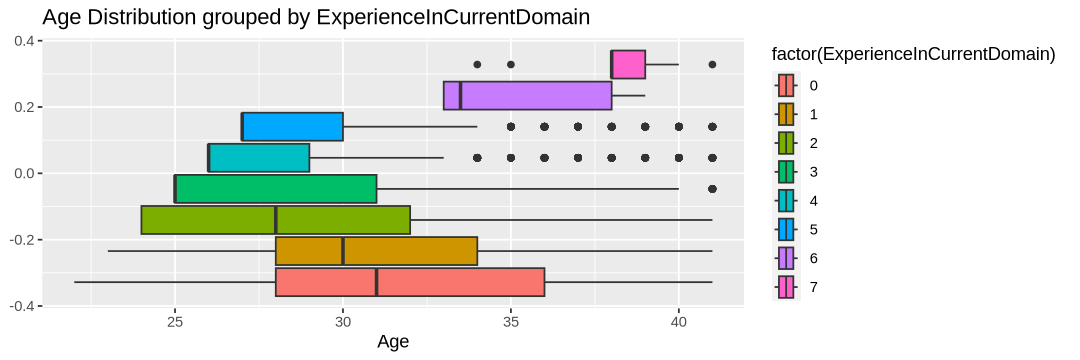

In [31]:
options(repr.plot.width = 9, repr.plot.height = 3)
ax1 <- ggplot(employee_data, aes(Age, fill = factor(ExperienceInCurrentDomain))) + geom_boxplot() + ggtitle("Age Distribution grouped by ExperienceInCurrentDomain")
ax1

We compared each of the explanatory variables with age to detect any correlation. `PaymentTier`, `Education`, `City`, `YearJoined`, `Gender`, `Everbenched` don't seem to have large impact on explaning age when plotted alone. For `ExperienceInCurrentDomain` however, it seems as if higher experience is correlated with increasing age with the exception of mid-age employees switching career domains as they have 0-1 years.

We filter out employees who seem to be switching careers and check the correlation.

[1] -0.1346429

[1] 0.01831297

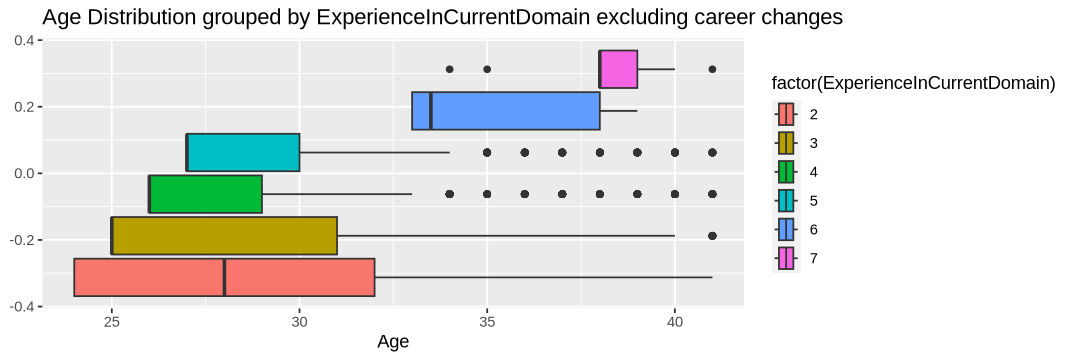

In [32]:
new <- employee_data |> filter(ExperienceInCurrentDomain >= 2)

options(repr.plot.width = 9, repr.plot.height = 3)
nx1 <- ggplot(new, aes(Age, fill = factor(ExperienceInCurrentDomain))) + geom_boxplot() + ggtitle("Age Distribution grouped by ExperienceInCurrentDomain excluding career changes")
nx1

cor(employee_data$Age, employee_data$ExperienceInCurrentDomain)
cor(new$Age, new$ExperienceInCurrentDomain)

It seems like ExperienceInCurrentDomain doesn't explain Age better when we exclude career changes. Perhaps if the data included this feature more results may be shown.

Overall, it seems like the explanatory variables aren't explaining the response very well when plotted alone. We keep all the variables and complete variable selection below.

<br>

### **Method**

Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code that does the analysis.

We use linear regression to predict an employees age. 
Linear regression was chosen over Ridge regression as we have many categorical variables and limited multicollinearity.
Since Linear regression performs no variable selection, we use backward selection to remove the least important variable, choosing the number of variables that minimizes $C_p$. 
Minimizing $C_p$ was chosen instead of AIC and BIC, as they penalize complex models and the dimension of our input variables is low.
Maximizing adj $R^2$ would result in generative modelling rather than predictive so it is skipped.
We split the data to avoid giving bias to our test results and use training for variable selection and test for assessing the model. 
We plan 70% for training and 30% for testing as we want to maximize the accuracy of the model during training.
The model will be assessed using $R^2$ as it represents the proportion of the variation of the response that can be explained with our selected variables.

#### **Splitting the data**

In [33]:
set.seed(123)
employee_split <- initial_split(employee_data, prop = 0.7, strata = PaymentTier)
employee_training <- training(employee_split)
employee_testing  <- testing(employee_split)

head(employee_training, 1)
head(employee_testing , 1)

Education JoiningYear City      PaymentTier Age Gender EverBenched
1 Masters   2017        New Delhi 2           37  Male   No         
  ExperienceInCurrentDomain LeaveOrNot
1 2                         0

Education JoiningYear City PaymentTier Age Gender EverBenched
1 Bachelors 2013        Pune 1           28  Female No         
  ExperienceInCurrentDomain LeaveOrNot
1 3                         1

<br>

#### **Backward selection**

[1] "figure 1: shows the number of variables minizing Cp"


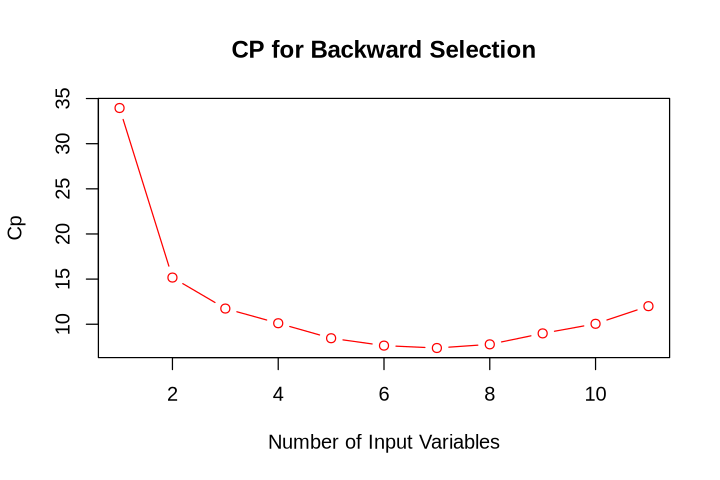

In [34]:
employee_backward_sel <- regsubsets(x = Age ~ ., nvmax = 11, data = employee_training, method = "backward")

employee_backward_summary <- summary(employee_backward_sel)

options(repr.plot.width = 6, repr.plot.height = 4)
plot(summary(employee_backward_sel)$cp, main = "CP for Backward Selection", xlab = "Number of Input Variables", ylab = "Cp", type = "b", col = "red")
print("figure 1: shows the number of variables minizing Cp")

In [35]:
cp_min_backward_sel = which.min(employee_backward_summary$cp) 
selected_var_backward_sel <- names(coef(employee_backward_sel, cp_min_backward_sel))[-1]
selected_var_backward_sel
print('Figure 2: shows the covariates minizing Cp')

[1] "EducationMasters"          "JoiningYear"              
[3] "CityNew Delhi"             "CityPune"                 
[5] "GenderMale"                "ExperienceInCurrentDomain"
[7] "LeaveOrNot1"

[1] "Figure 2: shows the covariates minizing Cp"


<br>

Above, we interpret the variables chosen as `Education`, `JoiningYear`, `City`, `Gender`, `ExperienceInCurrentDomain`, `LeaveOrNot`.

<br>

In [36]:
linear_model <- lm(formula = Age ~ ., data = employee_testing |> select(Education, JoiningYear, City, Gender, ExperienceInCurrentDomain, LeaveOrNot, Age))
glance(linear_model) |> pull(r.squared)
print('Figure 3: shows the R^2 of the test data')

[1] 0.02364648

[1] "Figure 3: shows the R^2 of the test data"


<br>

The $R^2$ of our model is 0.02. This means 2% of the variation in age can be explained by the explanatory variables when tested on the testing portion of our data `Education`, `JoiningYear`, `City`, `Gender`, `ExperienceInCurrentDomain`, `LeaveOrNot`. The test portion of our data was 30% of the original data randomly sampled from our original data.

<br>

In [38]:
employee_model = lm(Age~Education + JoiningYear + City + Gender + ExperienceInCurrentDomain + LeaveOrNot, data= employee_training )

tidy(employee_model) %>% mutate_if(is.numeric, round, 3)

term                      estimate std.error statistic p.value
1 (Intercept)               -125.916 93.057    -1.353    0.176  
2 EducationMasters             0.369  0.240     1.542    0.123  
3 EducationPHD                 0.156  0.438     0.357    0.721  
4 JoiningYear                  0.078  0.046     1.689    0.091  
5 CityNew Delhi               -0.847  0.234    -3.620    0.000  
6 CityPune                    -0.389  0.206    -1.892    0.059  
7 GenderMale                  -0.422  0.178    -2.370    0.018  
8 ExperienceInCurrentDomain   -0.392  0.053    -7.371    0.000  
9 LeaveOrNot1                 -0.938  0.188    -4.986    0.000

`geom_smooth()` using formula = 'y ~ x'


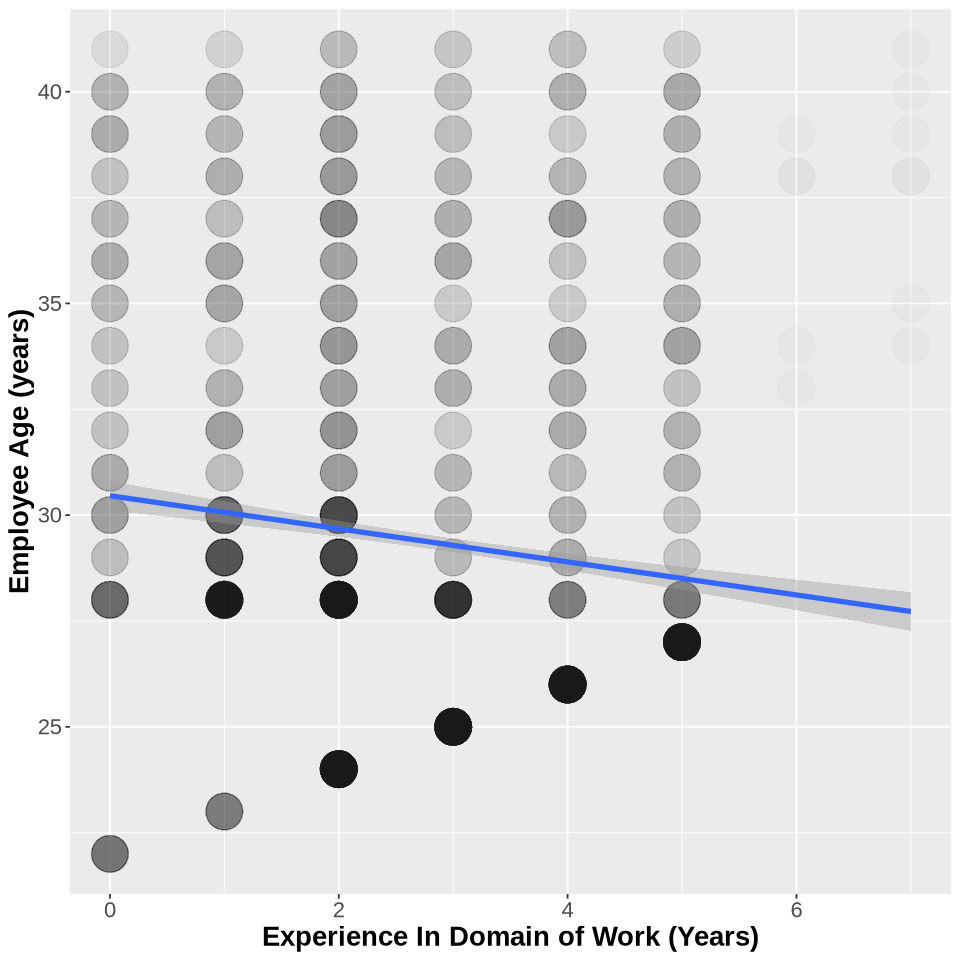

In [40]:
options(repr.plot.width = 8, repr.plot.height =8)


model_train_data <- employee_training%>%
    select(-PaymentTier,-EverBenched)


employee_model_plot <- ggplot(model_train_data, aes(x = ExperienceInCurrentDomain, y = Age)) +
  geom_point(alpha=0.02, size=10) +
  geom_smooth(method = lm, se = TRUE, fullrange=TRUE, linewidth = 1.5) +
  xlab("Experience In Domain of Work (Years)") +
  ylab("Employee Age (years)") +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
employee_model_plot

Although this plot is far from perfect, we see how the the regression line cuts through the most densly populated part of the grah as illustraded by the opacity of the data points. We can see that this is also imperfect because of the small variance and discrete nature of the the experience variable, never the less, the visualization helps show the distribution of the data and where the outlier are. 

In [41]:
y_pred <- predict(employee_model, employee_testing[-5])
y_true <- employee_testing$Age


RMSE <- sqrt(mean((y_true - y_pred)^2))
RMSE

[1] 4.928637

We see a RMSE of 4.9 years indicating that predictions are on average this far from their true value.

In [44]:
round(RMSE/(max(employee_testing$Age)-min(employee_testing$Age)),3)

[1] 0.259

When normalized for the range of the target variable we see that the RMSE is 25.9% indicating predictions are within a quarter of the the data range.

In [42]:
glance(employee_model)

r.squared  adj.r.squared sigma    statistic p.value      df logLik   
1 0.02774159 0.02534613    4.707515 11.58089  2.377961e-16 8  -9659.623
  AIC      BIC      deviance df.residual nobs
1 19339.25 19400.13 71955.78 3247        3256

### **Evaluation of Linear Assumptions**

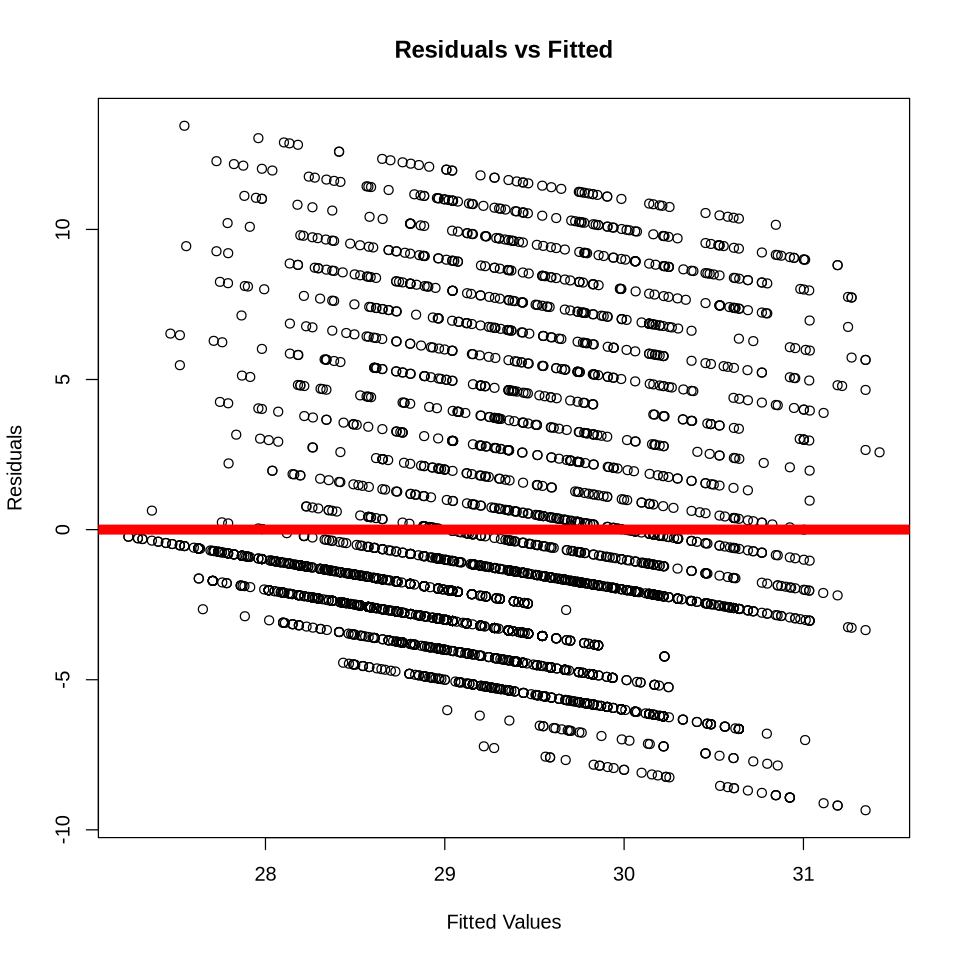

In [45]:
res= resid(employee_model)
plot(fitted(employee_model), res, xlab="Fitted Values", ylab= "Residuals", main="Residuals vs Fitted")
abline(0,0, col="red", lwd=8)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


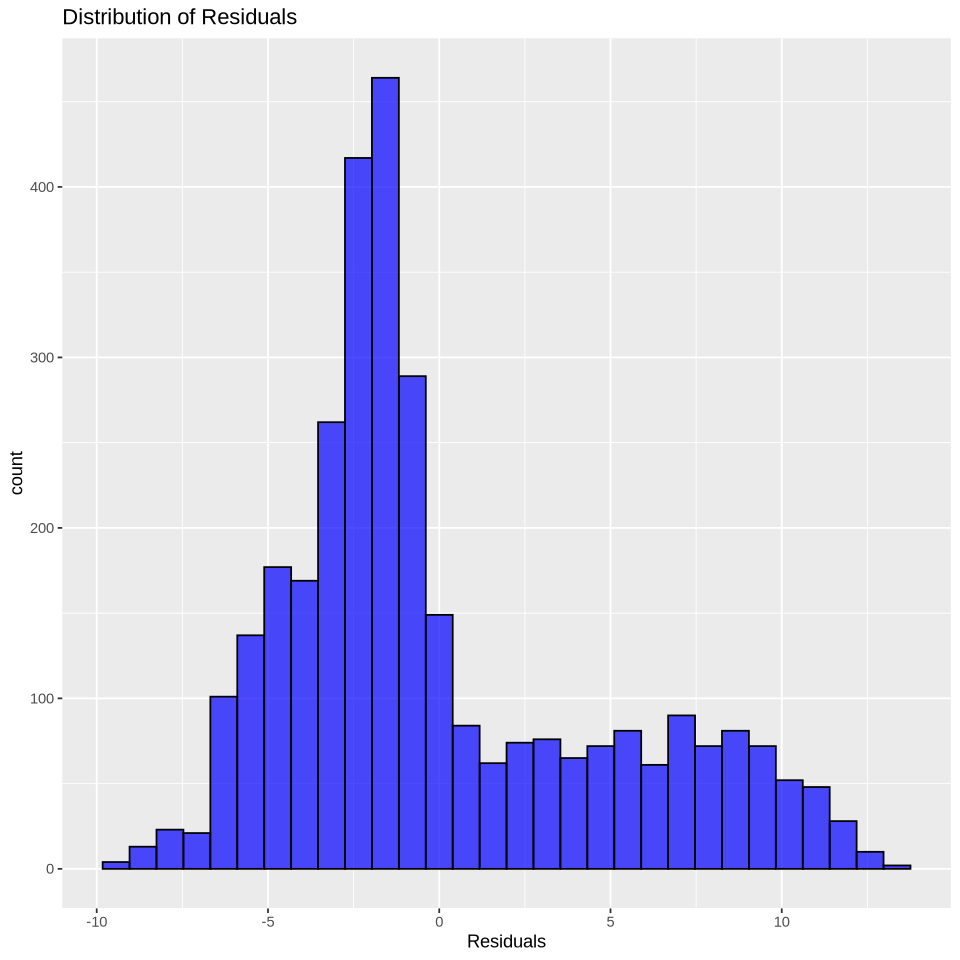

In [56]:
residuals_df <- as.data.frame(res)
ggplot(residuals_df, aes(x=res)) + 
    geom_histogram(color="black", fill="blue", alpha=0.7) +
    xlab("Residuals") +
    ggtitle("Distribution of Residuals")

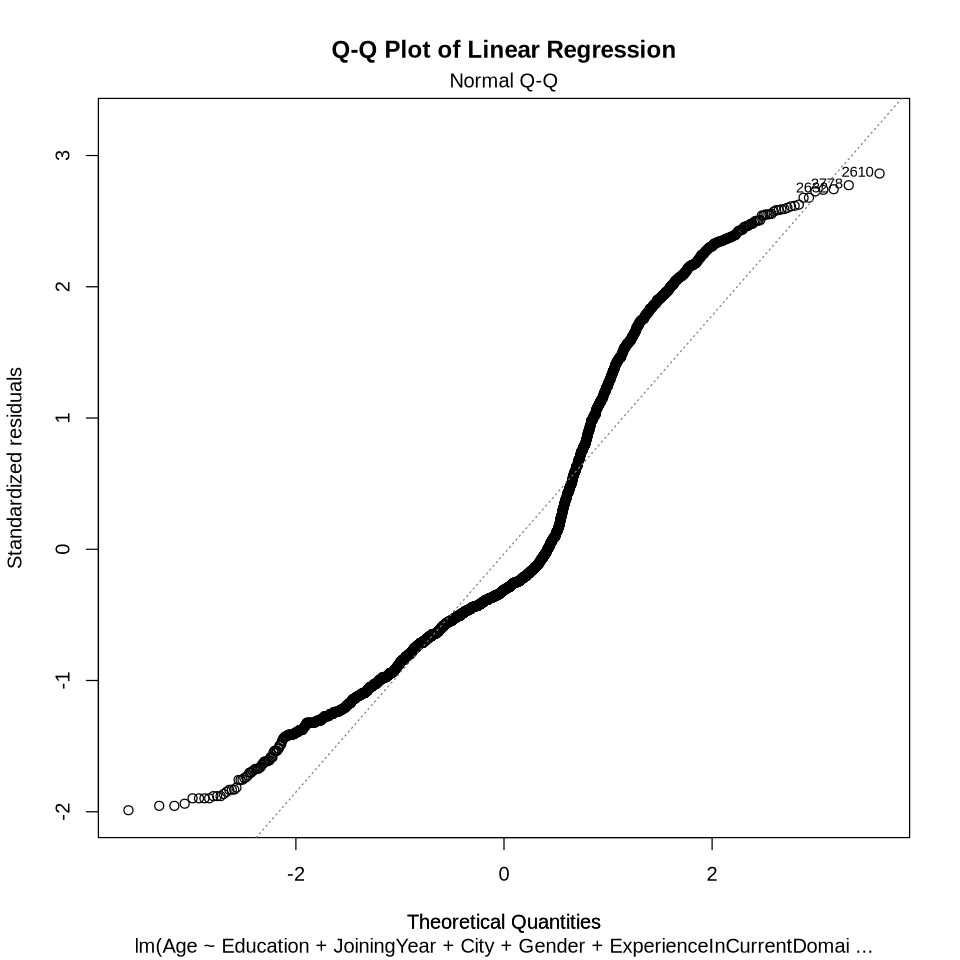

In [47]:
plot(employee_model, 2, main = "Q-Q Plot of Linear Regression", xlab="Theoretical Quantities")

## **Discussion**

Assessing the model on the test set, we got $R^2 = 0.02$. This means our model doesn't predict age well, as only 2% of the variation in Age can be explained by the variables `Education`, `JoiningYear`, `City`, `Gender`, `ExperienceInCurrentDomain`, `LeaveOrNot`. Because of the limited performance, using this model to predict an employee's age to plan a company's resources may not be optimal. We expected the low score, as the possibility of age diverse hires is likely at many work places.

To improve the model, we could perform more exploratory analysis to detect possible interaction between variables, as only the linear combination of the variables was used in the model. In other words, the result of our model looked at the variables independently rather than together. Using a more complicated model like random forest regression and collecting more relevant variables could improve the performance.

A future question is determining if a different set of variables can be used for age prediction.

**References**

Xiang Gao, Junhao Wen, Cheng Zhang, "An Improved Random Forest Algorithm for Predicting Employee Turnover", Mathematical Problems in Engineering, vol. 2019, Article ID 4140707, 12 pages, 2019. https://doi.org/10.1155/2019/4140707

Shore, L. M., Cleveland, J. N., & Goldberg, C. B. (2003). Work attitudes and decisions as a function of manager age and employee age. Journal of Applied Psychology, 88(3), 529–537. https://doi.org/10.1037/0021-9010.88.3.529